In [1]:
import numpy as np
from finetune_resnet import get_models, preprocess_images, preprocess_labels, market_attribute_accuracy, cmc_accuracy
import h5py
import matplotlib.pyplot as plt

C:\tools\miniconda3\lib\site-packages\h5py\__init__.py:75: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
dataset = h5py.File("../Market-1501/market.h5", "r")
list(dataset)

['test_images',
 'test_images_files',
 'test_labels',
 'train_images',
 'train_images_files',
 'train_labels']

In [3]:
attribute_model, training_model, inference_model = get_models()
training_model.load_weights("../models/full-model-weights-16.h5")














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
x = dataset["test_images"]
attributes = dataset["test_labels"]
files = dataset["test_images_files"]

In [5]:
x.shape, attributes.shape, files.shape

((12692, 128, 64, 3), (12692, 27), (12692,))

In [6]:
attribute_model.compile("adam", "binary_crossentropy", metrics=[market_attribute_accuracy])
res = attribute_model.evaluate(preprocess_images(np.array(x)), preprocess_labels(np.array(attributes)))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
12692/12692 [==============================] - 814s 64ms/step


In [7]:
print("accuracy:", res[0] * 100)

accuracy: 29.69281941539588


In [8]:
sample = x[:100:10]
res = attribute_model.predict(sample)

In [9]:
res.shape

(10, 27)

(0.8219803, 'age') (0.11570054, 'backpack') (0.21467206, 'bag') (0.9971993, 'clothes') (1.04010105e-05, 'down') (0.003538549, 'downblack') (2.9116869e-05, 'downblue') (0.05721554, 'downbrown') (0.23231804, 'downgray') (5.9574842e-05, 'downgreen') (0.0009742677, 'downpink') (1.1920929e-07, 'downpurple') (0.014013201, 'downwhite') (0.0016944408, 'downyellow') (0.14984205, 'gender') (0.60019505, 'hair') (0.0010161102, 'handbag') (0.0010150671, 'hat') (0.19778788, 'up') (0.0018543005, 'upblack') (4.798174e-06, 'upblue') (0.04040602, 'upgray') (0.00031271577, 'upgreen') (1.7881393e-06, 'uppurple') (0.0073187947, 'upred') (0.97498995, 'upwhite') (0.0031543672, 'upyellow')


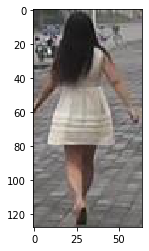

In [10]:
print(*zip(res[0], attributes.attrs["labels"]))
plt.imshow(sample[0] / 255.)

(0.47554156, 'age') (0.07831007, 'backpack') (0.60395896, 'bag') (0.99824953, 'clothes') (4.708767e-06, 'down') (0.040704787, 'downblack') (6.4730644e-05, 'downblue') (0.0021832287, 'downbrown') (0.3085066, 'downgray') (0.003296703, 'downgreen') (0.00087812543, 'downpink') (5.9604645e-08, 'downpurple') (0.0145407915, 'downwhite') (0.001970917, 'downyellow') (0.4798316, 'gender') (0.6174371, 'hair') (0.0005067885, 'handbag') (0.00039726496, 'hat') (0.08872387, 'up') (0.0017764866, 'upblack') (3.7252903e-06, 'upblue') (0.0642198, 'upgray') (0.00017035007, 'upgreen') (2.5629997e-06, 'uppurple') (0.005809039, 'upred') (0.99258876, 'upwhite') (0.00043302774, 'upyellow')


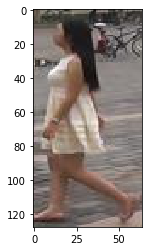

In [11]:
print(*zip(res[2], attributes.attrs["labels"]))
plt.imshow(sample[2] / 255.)

(0.8152819, 'age') (0.0071752965, 'backpack') (0.1971409, 'bag') (0.99990237, 'clothes') (0.40802795, 'down') (0.049716085, 'downblack') (0.00047114491, 'downblue') (0.0045728683, 'downbrown') (0.019738853, 'downgray') (9.23872e-06, 'downgreen') (9.536743e-07, 'downpink') (1.4722347e-05, 'downpurple') (0.012035102, 'downwhite') (7.390976e-05, 'downyellow') (0.27514756, 'gender') (0.08212963, 'hair') (0.005516827, 'handbag') (8.493662e-06, 'hat') (0.99990535, 'up') (1.4901161e-07, 'upblack') (0.0070384145, 'upblue') (0.00034710765, 'upgray') (1.0162592e-05, 'upgreen') (0.6641645, 'uppurple') (0.0005745888, 'upred') (0.008240165, 'upwhite') (0.0003008635, 'upyellow')


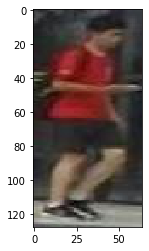

In [12]:
print(*zip(res[9], attributes.attrs["labels"]))
plt.imshow(sample[9] / 255.)

In [29]:
# image_feature = inference_model.predict(preprocess_images(np.array(x)), verbose=1)
# ids = np.array([int(file[:4]) for file in files])
print("Top-1 accuracy: ", cmc_accuracy(image_feature, ids, k=1))
print("Top-5 accuracy: ", cmc_accuracy(image_feature, ids, k=5))

Top-1 accuracy:  0.45898056052338554
Top-5 accuracy:  0.501481987533428


In [30]:
sample = x[:2000:2]
res = inference_model.predict(preprocess_images(np.array(sample)))

In [31]:
res.shape

(1000, 539)

In [32]:
images = files[:2000:2]
images.shape

(1000,)

image query


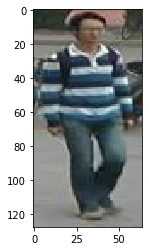

In [33]:
print("image query")
query = 200
plt.imshow(sample[query] / 255.)

In [34]:
diff = res[1:] - res[query]
dist = np.linalg.norm(diff, axis=-1)
dist

array([39.034927, 39.04785 , 43.495502, 41.622894, 41.601215, 39.04606 ,
       36.974552, 38.356205, 35.886322, 40.52499 , 39.955452, 39.415695,
       42.728283, 43.048576, 41.04987 , 40.556698, 38.096302, 41.711697,
       42.55421 , 38.589   , 38.892704, 39.012733, 38.55827 , 39.626343,
       39.519142, 39.27209 , 40.419186, 42.14132 , 39.419743, 39.562584,
       38.87902 , 43.84086 , 42.978584, 40.41141 , 42.36    , 36.969242,
       37.136097, 36.589314, 36.272152, 36.518997, 36.702885, 35.839333,
       35.72653 , 35.363266, 35.509518, 32.39648 , 38.337986, 35.913383,
       35.423096, 37.02139 , 38.68734 , 40.22293 , 35.483196, 42.780445,
       41.019787, 35.05837 , 38.073368, 37.641323, 37.40257 , 40.618515,
       37.492737, 41.97812 , 38.564323, 41.840332, 42.699398, 40.616695,
       39.375336, 37.592323, 37.029686, 35.1002  , 36.822807, 30.353958,
       33.815964, 34.87111 , 35.507343, 34.601177, 36.40029 , 27.99276 ,
       27.521612, 34.459927, 41.414112, 40.53457 , 

closest in gallery


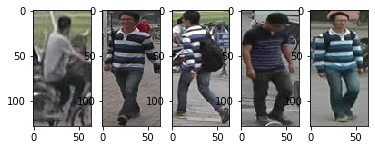

In [35]:
k = 5
ordered = np.argpartition(dist, k)[:k]
ordered
print("closest in gallery")
plt.subplot(151)
plt.imshow(sample[ordered[0]] / 255.)
plt.subplot(152)
plt.imshow(sample[ordered[1]] / 255.)
plt.subplot(153)
plt.imshow(sample[ordered[2]] / 255.)
plt.subplot(154)
plt.imshow(sample[ordered[3]] / 255.)
plt.subplot(155)
plt.imshow(sample[ordered[4]] / 255.)

furthest in gallery


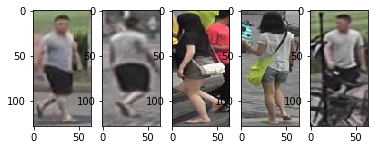

In [36]:
k = 5
ordered = np.argpartition(-dist, k)[:k]
ordered
print("furthest in gallery")
plt.subplot(151)
plt.imshow(sample[ordered[0]] / 255.)
plt.subplot(152)
plt.imshow(sample[ordered[1]] / 255.)
plt.subplot(153)
plt.imshow(sample[ordered[2]] / 255.)
plt.subplot(154)
plt.imshow(sample[ordered[3]] / 255.)
plt.subplot(155)
plt.imshow(sample[ordered[4]] / 255.)